***ВИЗУАЛИЗАЦИЯ ДАННЫХ*** 
* Использованы данные по фильмам и сериалам Netflix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
#Проверим на пропуски
for column in df:
    missings = df[column].isnull().mean()
    print(f'{column} - {missings :.1%}')

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 31.6%
cast - 9.1%
country - 7.6%
date_added - 0.2%
release_year - 0.0%
rating - 0.2%
duration - 0.0%
listed_in - 0.0%
description - 0.0%


In [3]:
#Уберем часть данных, которые не будем использовать
df.drop(["director", "cast", "description"],axis =1,inplace=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies


In [10]:
#в столбце 'country' 7.6% пропусков, но он интересен для дальнейшей визуализации, поэтому проверим, 
# чем можно заменить пустые значения
df['country'].value_counts()

United States                                            2032
India                                                     777
United Kingdom                                            348
Japan                                                     176
Canada                                                    141
                                                         ... 
Netherlands, Belgium                                        1
Russia, Spain                                               1
United Kingdom, Canada, United States, Cayman Islands       1
United States, Malta, United Kingdom                        1
France, Poland                                              1
Name: country, Length: 554, dtype: int64

In [11]:
df['country'].value_counts().describe()

count     554.000000
mean       10.393502
std        94.531167
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2032.000000
Name: country, dtype: float64

In [4]:
df.country.mode()[0]

'United States'

In [5]:
# заменим пустые данные модой и проверим на сколько исказятся показатели
df['country'].replace(np.nan,"United States",inplace=True)

In [14]:
#среднее значение в результате увеличилось лишь на единицу, медиана осталась прежней
df['country'].value_counts().describe()

count     554.000000
mean       11.252708
std       113.249094
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2508.000000
Name: country, dtype: float64

In [122]:
#Посмотрим Топ-10 стран, выпускающих контент для Netflix
countries = df[['country', 'type']].groupby('country').count().sort_values('type',ascending=False).head(10)

countries.reset_index(inplace=True)

countries

,country,type
0,United States,2500
1,India,777
2,United Kingdom,347
3,Japan,175
4,Canada,141
5,South Korea,136
6,Spain,117
7,France,90
8,Mexico,83
9,Turkey,79


Text(0, 0.5, 'Страна')

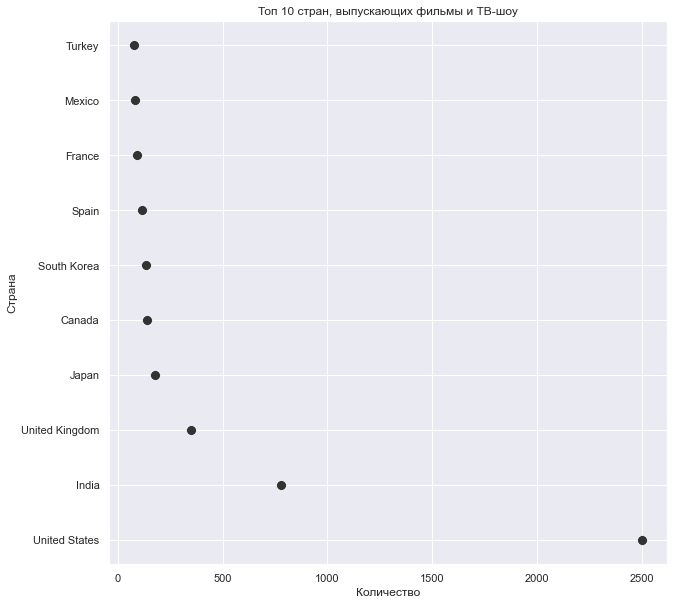

In [124]:
plt.figure(figsize=(10, 10))

sns.scatterplot(countries.type, countries.country, s=100, color=".2")
sns.set_style("darkgrid")
plt.title('Топ 10 стран, выпускающих фильмы и ТВ-шоу')
plt.xlabel('Количество')
plt.ylabel('Страна')

Абсолютный лидер по выпуску фильмов и ТВ-шоу для Netflix - США. Это неудивительно, так как США лидер мировой киноиндустрии, да и сама компания имеет штаб-квартиру в Калифорнии.

In [114]:
#Далее посмотрим как распределяется размещение контента по месяцам.
#попробуем получить год и месяц добавления фильмов и шоу из столбца 'date_added'
df = df[df['date_added'].notnull()]

In [115]:
df_month = df[['date_added']].dropna()
df['added_year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])
df['month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_m = df.groupby('added_year')['month'].value_counts().unstack().fillna(0)[month_order].T 

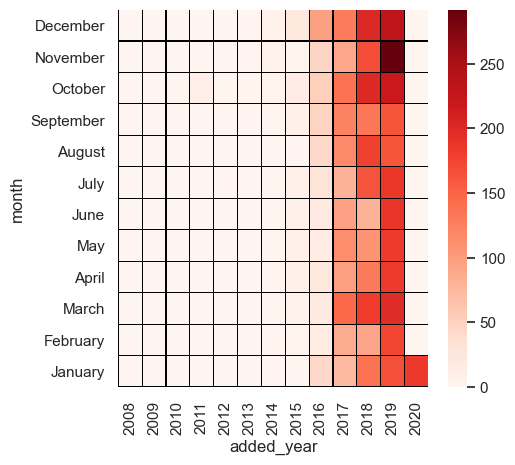

In [118]:
plt.figure(figsize=(5, 5), dpi=100)
sns.heatmap(df_m, cmap='Reds', linewidths=0.1, linecolor='black')


* Январь - год от года количество размещаемого контента в этом месяце росло, но все равно наблюдается спад по сравнению с октябрем-декабрем - возможно, потому что в Европе и США больше выходных дней в декабре, чем в январе.
* Февраль - сравнительно невысокие показатели размещений.
* Март - каждый год значительный рост размещаемого контента, сложно определить закономерность без дополнительной информации, возможно есть связь с сезонностью съемочного процесса. Можно также предположить связь с пасхальными каникулами в Европе и США.
* Апрель-Июль - стабильный средний показатель размещений.
* Август-Сентябрь - заметен спад, можно связать с сезоном летних отпусков (пляжный отдых становится предпочтительнее просмотра сериалов и шоу)
* Октябрь - послеотпускной рост, время осенних премьер сериалов.
* Ноябрь - высокие показатели роста размещений контента (плохая погода, пользователи больше времени проводят дома даже в выходные, также в США череда праздников)
* Декабрь - стабильно высокие показатели (традиционные семейные рождественские и новогодние праздники, пользователи много времени проводят дома)

In [62]:
df[df['added_year'] == 2020].shape

(184, 10)

In [68]:
# Данные за 2020 год лучше исключить из анализа по годам, так как они неполные(источник данных это подтверждает 
#'This dataset consists of tv shows and movies available on Netflix as of 2019')
df_years = df[df.added_year < 2020]

In [70]:
showmovie = df_years.filter(['title', 'added_year', 'type'], axis=1)
showmovie = showmovie.groupby(['added_year', 'type']) \
                .count().reset_index() \
                .rename(columns={'title' : 'count'})


In [72]:
showmovie = showmovie.pivot(index='added_year', columns='type')['count']
showmovie

type,Movie,TV Show
added_year,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,4.0,3.0
2013,6.0,6.0
2014,19.0,6.0
2015,58.0,32.0
2016,264.0,192.0


Text(0, 0.5, 'Количество')

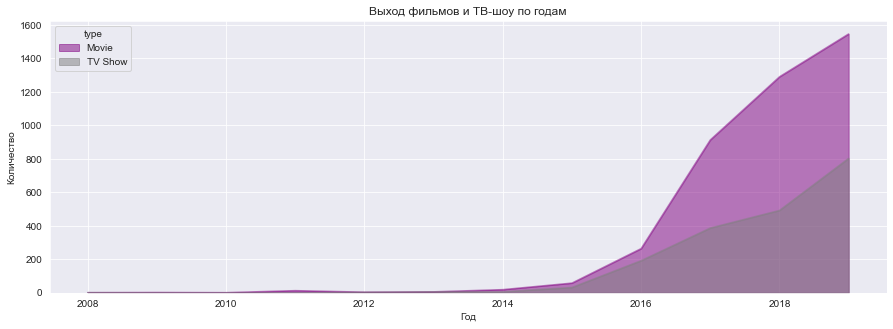

In [84]:
sm = showmovie.plot.area(color=["purple","gray"], stacked = False, rot=0, title="Выход фильмов и ТВ-шоу по годам",figsize = (15,5)
)
sm.set_xlabel("Год")
sm.set_ylabel("Количество")

В датасете приводится статистика по размещению контента начиная с 2008 года, но заметное развитие платформы можно наблюдать только с 2016 года. Возможно это связано с выходом компании на международный рынок, а также запуском производства собственных сериалов и ТВ-шоу. Количество фильмов, на всём протяжении наблюдения, стабильно превышает количество ТВ-шоу.

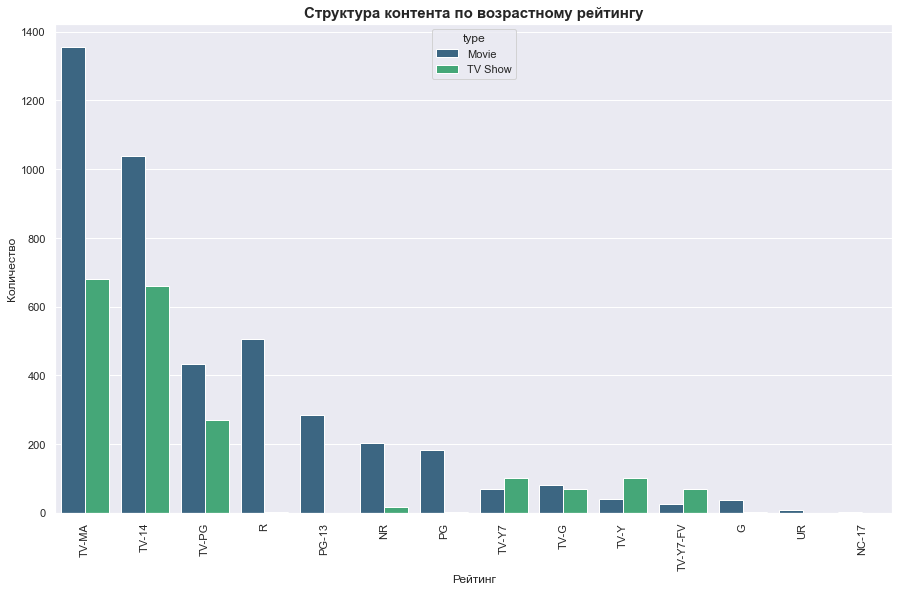

In [111]:
#Посмотрим разбивку фильмов и ТВ-шоу по возрастному рейтингу размещаемого контента
sns.set()
plt.figure(figsize=(15,9))
sns.countplot(x="rating",data= df,order = df['rating'].value_counts().index[0:15],hue = "type", palette ="viridis")
plt.xticks(rotation=90)
plt.title('Структура контента по возрастному рейтингу', fontsize=15, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Отсюда можно увидеть, что по большинству возрастных рейтингов фильмов размещают больше, чем ТВ-шоу. Также можно заметить, что некоторые рейтинги используются только для градации фильмов.
Более подробные выводы по возрастному рейтингу можно сделать и по этой визуализации, но нужно потратить время на расшифровку рейтингов и соотнесение их с определенной возрастной категорией.
Поэтому попробуем рассмотреть более наглядную разбивку на фильмы/ТВ-шоу с градацией по возрасту

Расшифровка рейтингов:
* NR, TV-Y, TV-Y7, G, TV-G, PG, TV-PG - для детей
* PG-13, TV-14 - для подростков
* R, TV-MA, NC-17 - взрослая аудитория 

In [54]:
movie = df[df['type'] == 'Movie']

In [55]:
# тут только те рейтинги, которые присваивают фильмам
rating_order_mov =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

In [56]:
movie_rating = movie['rating'].value_counts()[rating_order_mov]

In [109]:
def barplot(data, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, width=0.6, edgecolor='black')

    color =  ['green', 'violet',  'blue']
    span_range = [[0, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Дети', 'Подростки', 'Взрослые']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    fontsize=11, fontweight='bold')
        ax.axvspan(span_range[idx][0]-0.5,span_range[idx][1]+0.5,  color=color[idx], alpha=0.4)

    ax.set_title('Рейтинг фильмов', fontsize=15, fontweight='bold')
    plt.show()

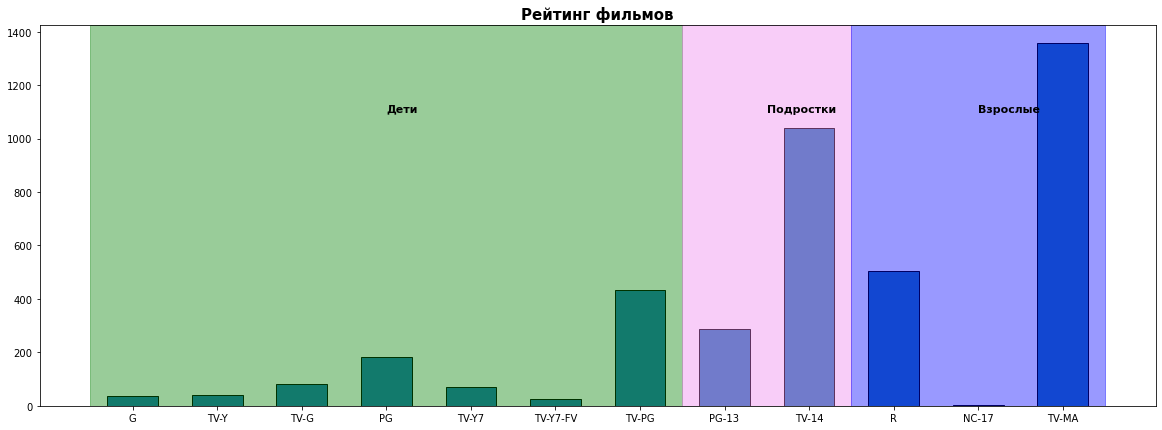

In [110]:
barplot(movie_rating, 1100)

Большая часть, размещенных фильмов, рассчитана на взрослую аудиторию и подростков. Детских фильмов относительно немного.

In [28]:
# тут только те рейтинги, которые присваивают ТВ-шоу
rating_order_tv =  ['NR','TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'TV-MA']

In [19]:
tv_show = df[df['type'] == 'TV Show']

In [29]:
tv_rating = tv_show['rating'].value_counts()[rating_order_tv]

In [119]:
def barplot_tv(data, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(17, 8))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, width=0.6, edgecolor='black')

    color =  ['green', 'blue']
    span_range = [[0, 5], [6, 7]]

    for idx, sub_title in enumerate(['Дети','Взрослые и подростки']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    fontsize=8, fontweight='bold')
        ax.axvspan(span_range[idx][0]-0.5, span_range[idx][1]+0.5,  color=color[idx], alpha=0.4)

    ax.set_title('Рейтинг ТВ-шоу', fontsize=15, fontweight='bold')
    plt.show()

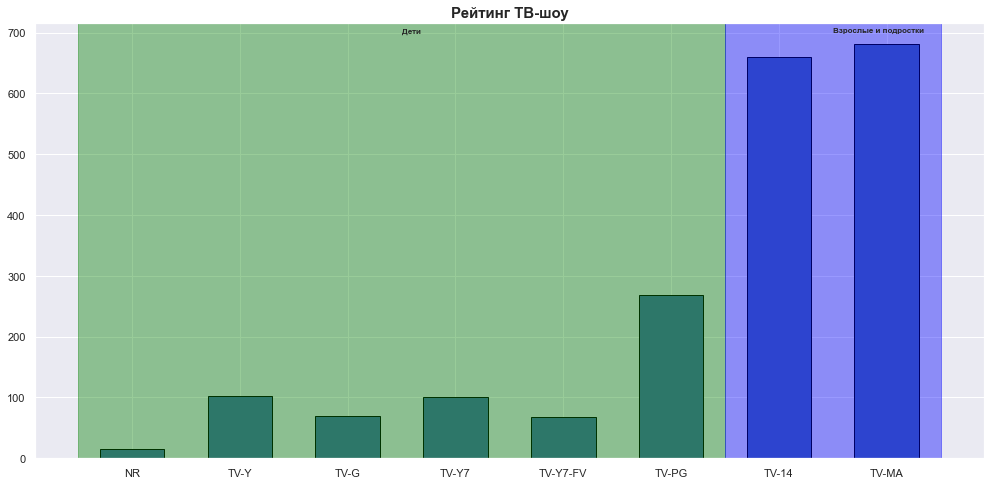

In [120]:
barplot_tv(tv_rating, 700)

Хотя доля подростковых и взрослых ТВ-шоу достаточно велика, но и контента для детей размещается достаточно много.